In [1]:
import sys

import bioinfoLib as binf
import scanpy as sc
import scvi

sc.set_figure_params(figsize=(5, 5))

sys.path.append("../models")
from scvi_vamp_prior import *

simulate_new_data = False
if simulate_new_data:
    import ipynbname

    ro = binf.R.utils.start_r_session()
    splat_func = binf.R.utils.splatter_helper(ro)

    import os

    # I dont know why working directory was in the bioinfoLib/R
    os.chdir(str(ipynbname.path().parent))
    test_data = binf.R.utils.splatter_simulate_loop(
        splat_func, ro, 0.05, 0.05, [1000, 1000], 10
    )
    test_data.write_h5ad("../data/adata_test_scvi.h5ad")

Julia package information:
Ripserer exists
StatsBase exists
Combinatorics exists
Graphs exists
SimpleWeightedGraphs exists
Detected IPython. Loading juliacall extension. See https://juliapy.github.io/PythonCall.jl/stable/compat/#IPython


In [2]:
adata = sc.read_h5ad("../data/adata_test_scvi.h5ad")

In [3]:
binf.scr.qc.normalize_and_select_hvg(adata)

counts layer is not available and X is not log1p transformed. Copy X to counts before normalization


/home/stanfish/Git/vae/.venv/lib/python3.12/site-packages/bioinfoLib/scRNAseq/qc.py:238: UserWarning: batch_key sample_labels not found in adata.obs. Will compute HVG on all cells.
  warnings.warn(


no raw in adata, so save X to raw before computing hvg


In [4]:
sc.pp.pca(adata)
sc.pp.neighbors(adata)
sc.tl.umap(adata)

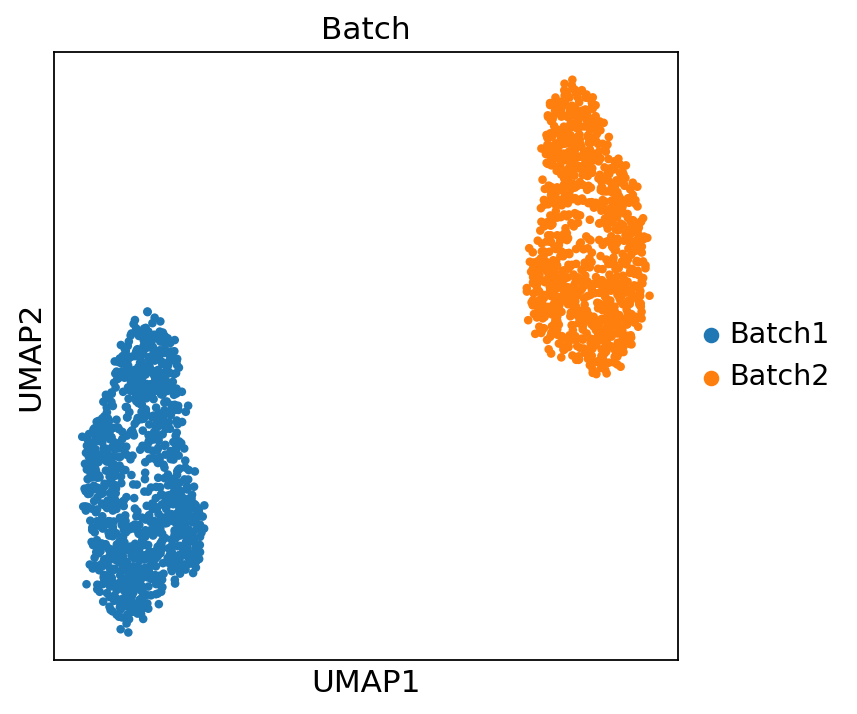

In [5]:
sc.pl.umap(adata, color="Batch")

In [6]:
SCVI.setup_anndata(adata, batch_key="Batch")
model = SCVI(adata, gene_likelihood="nb", n_hidden=128, n_latent=10)
model.train(max_epochs=200)
adata.obsm["scvi"] = model.get_latent_representation()

/home/stanfish/Git/vae/.venv/lib/python3.12/site-packages/scvi/data/fields/_base_field.py:63: UserWarning: adata.X does not contain unnormalized count data. Are you sure this is what you want?
  self.validate_field(adata)
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
You are using a CUDA device ('NVIDIA GeForce RTX 3060 Laptop GPU') that has Tensor Cores. To properly utilize them, you should set `torch.set_float32_matmul_precision('medium' | 'high')` which will trade-off precision for performance. For more details, read https://pytorch.org/docs/stable/generated/torch.set_float32_matmul_precision.html#torch.set_float32_matmul_precision
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
/home/stanfish/Git/vae/.venv/lib/python3.12/site-packages/lightning/pytorch/trainer/connectors/data_connector.py:425: The 'train_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers`

Training:   0%|          | 0/200 [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_epochs=200` reached.


In [39]:
scvi.model.SCVI.setup_anndata(adata, batch_key="Batch")
model = scvi.model.SCVI(adata, gene_likelihood="nb")
model.train(max_epochs=200)
adata.obsm["scvi"] = model.get_latent_representation()

/home/stanfish/Git/vae/.venv/lib/python3.12/site-packages/scvi/data/fields/_base_field.py:63: UserWarning: adata.X does not contain unnormalized count data. Are you sure this is what you want?
  self.validate_field(adata)
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
/home/stanfish/Git/vae/.venv/lib/python3.12/site-packages/lightning/pytorch/trainer/connectors/data_connector.py:425: The 'train_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=23` in the `DataLoader` to improve performance.


Training:   0%|          | 0/200 [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_epochs=200` reached.


In [9]:
sc.pp.neighbors(adata, use_rep="scvi", key_added="nei_scvi")
sc.tl.umap(adata, neighbors_key="nei_scvi", key_added="umap_scvi")

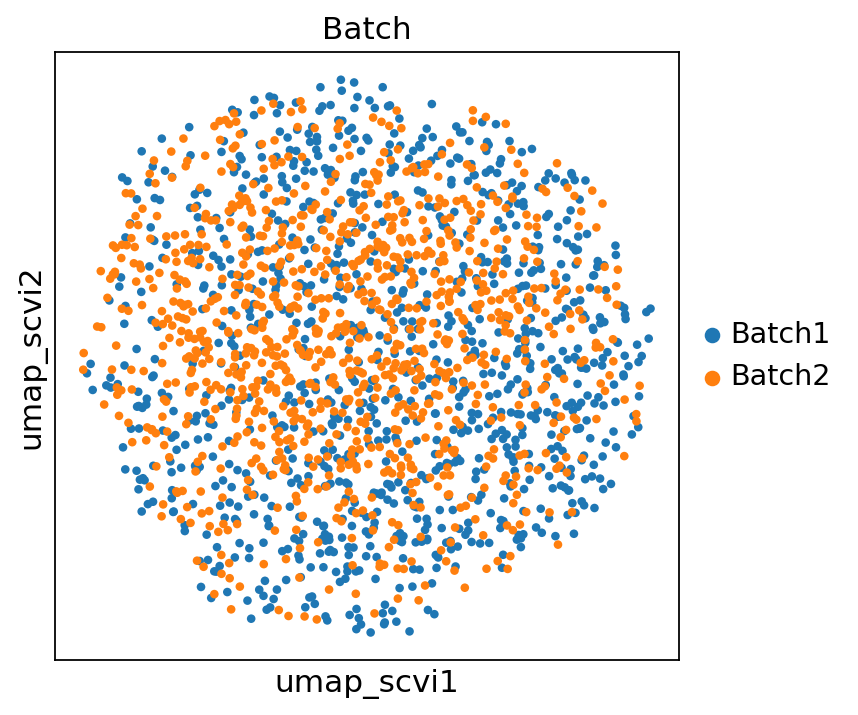

In [10]:
sc.pl.embedding(adata, basis="umap_scvi", color="Batch")

In [21]:
adata_sub = adata[adata.obs["Batch"] == "Batch2"].copy()
sc.pp.neighbors(adata_sub)
sc.tl.diffmap(adata_sub)

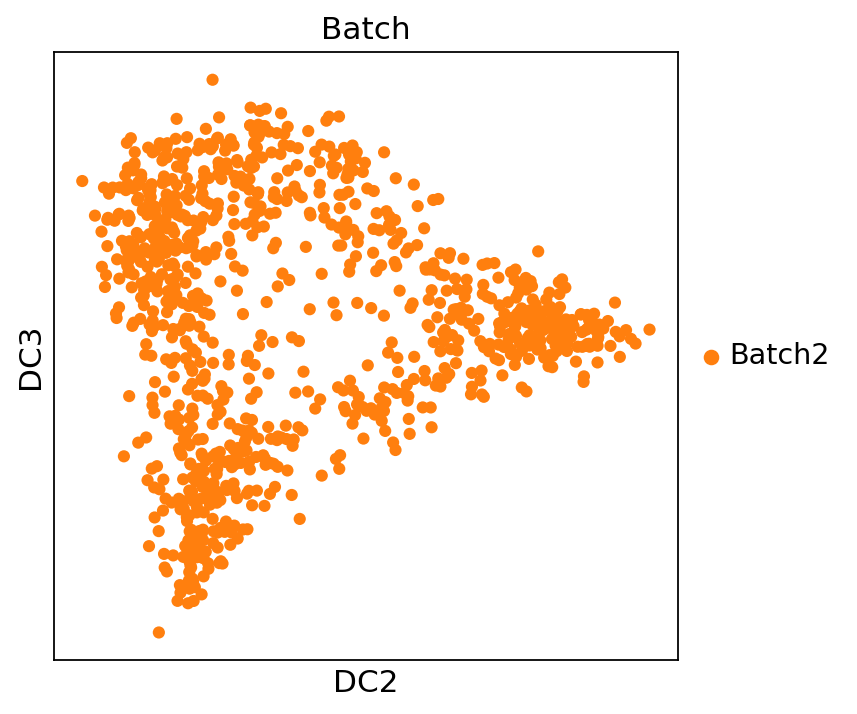

In [22]:
sc.pl.embedding(adata_sub, basis="diffmap", components=["2,3"], color="Batch")

In [11]:
sc.tl.diffmap(adata, neighbors_key="nei_scvi")

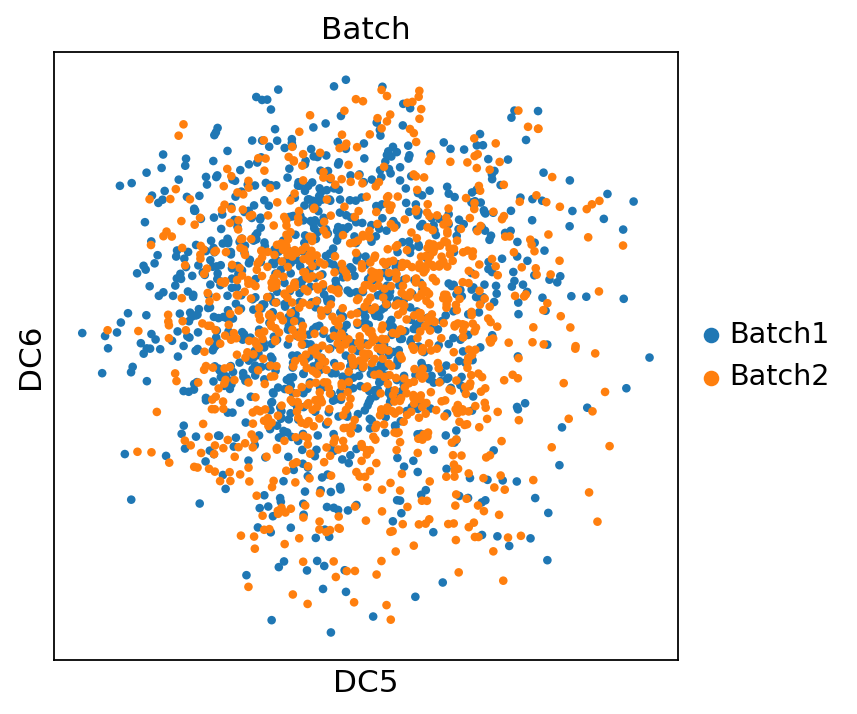

In [16]:
sc.pl.embedding(adata, basis="diffmap", components=["5,6"], color="Batch")